In [1]:
# conda activate pytorch_wildlife
# pip install PytorchWildlife

In [1]:
### Imports for the Project

In [2]:
## Essential Data Science Library
import cv2
import os
import numpy as np 
import pandas as pd 
import torch

## Essential / Popular Visiualisation Library
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from torch.utils.data import DataLoader
from PytorchWildlife.models import detection as pw_detection
from PytorchWildlife.data import transforms as pw_trans
from PytorchWildlife.data import datasets as pw_data 
from PytorchWildlife import utils as pw_utils
%matplotlib inline
from random import randint

/Users/pranjal/anaconda3/envs/pytorch_wildlife/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
### Reading Dataset

In [3]:
dir = 'data/Set1'
folders = ['data/Set1/{}'.format(i) for i in os.listdir(dir)]

In [4]:
folders.remove('data/Set1/.DS_Store')
folders.remove('data/Set1/labels.txt')
folders.remove('data/Set1/README.txt')

In [6]:
folders_seq = []
for folder in folders:
    for i in os.listdir(folder):
        temp_folder = folder+'/'+i.format(i)
        folders_seq.append(temp_folder)

In [7]:
img_data = []
for folder in folders_seq:
    if '.DS_Store' not in folder:
        for i in os.listdir(folder):
            # print(i)
            temp_folder = folder+'/'+i.format(i)
            img_data.append(temp_folder)

In [8]:
def extract_substring(path):
    start_marker = 'data/Set1/'

    start_pos = path.find(start_marker) + len(start_marker)

    end_pos = path.find('/', start_pos)

    return path[start_pos:end_pos]

In [9]:
### Extracting Labels from folder

In [10]:
labels = [extract_substring(i) for i in img_data]

### Number of Total Images 


In [11]:
print('No of Total Images for Missouri Camera traps set1 are : ', len(img_data))

No of Total Images for Missouri Camera traps set1 are :  25055


In [3]:
# img_data[73]

### Image of Ocelot from First folder


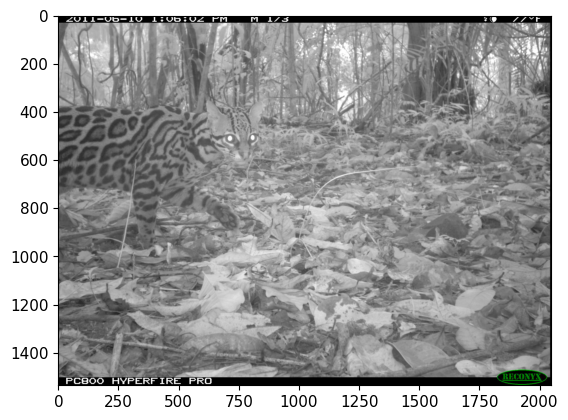

In [78]:
pic = plt.imshow( cv2.imread(img_data[73], cv2.IMREAD_COLOR))

### Random 15 Images from the Dataset


In [83]:
random_image_no = [randint(0, 24673) for _ in range(9)]

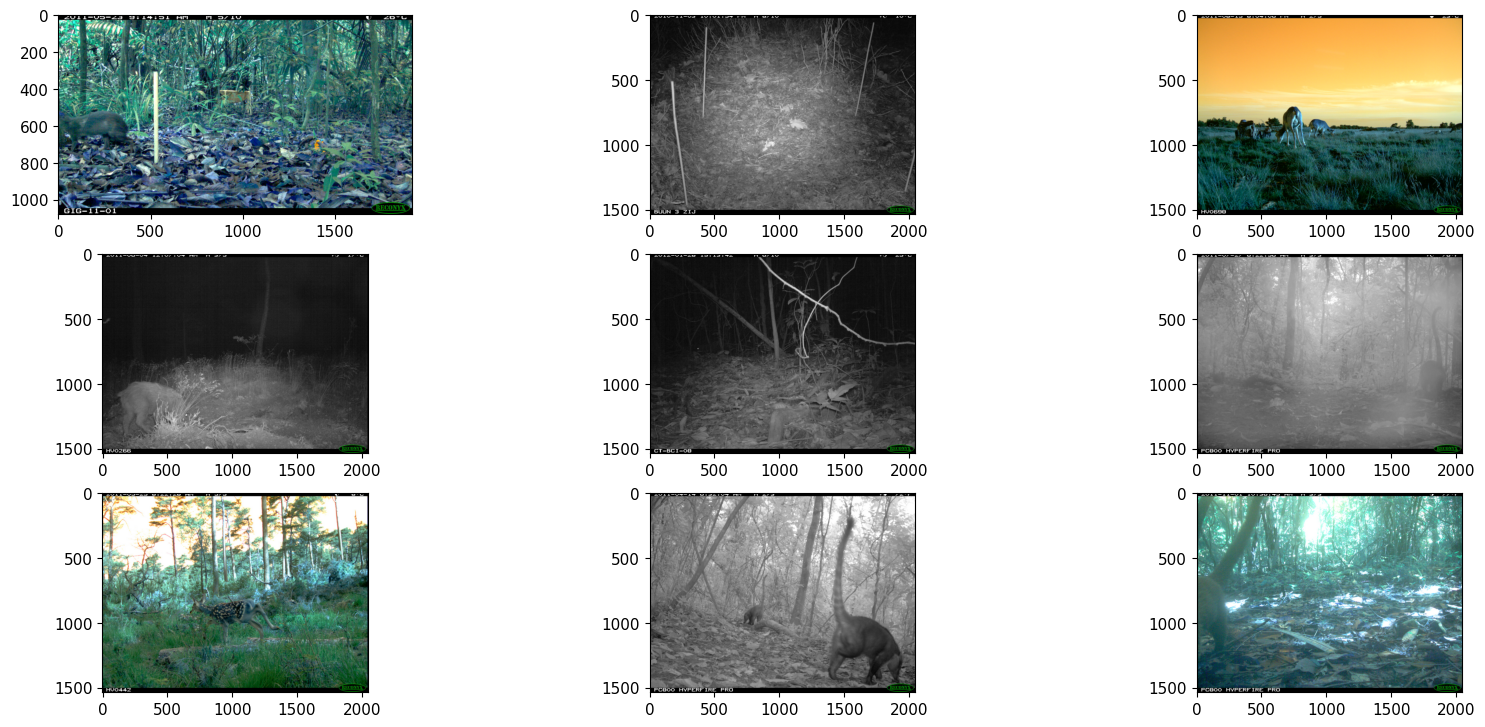

In [89]:
columns = 3
show =15
plt.figure(figsize=(20,15))
idx = 0
for number in random_image_no:    
    temp = cv2.imread(img_data[number], cv2.IMREAD_COLOR) 
    plt.subplot(int(np.ceil(show / columns) ), columns, idx + 1)
    plt.imshow(temp)
    idx += 1
plt.show()

### Random Images from LILA Dataset

#### As per observation Images are not Clear and time of the photo taken is varied throughout the day

In [90]:
## Check file with location of the animal

In [91]:
dir = 'data/Set1'
folders = ['data/Set1/{}'.format(i) for i in os.listdir(dir)]
# folders

In [92]:
def parse_file_to_dict(file_path):
    data_dict = {}    
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.split()  # Split by whitespace
            if len(parts) < 2:  # Check for minimum length
                continue
            path = parts[0]  # First part is the path
            num_boxes = int(parts[1])  # Second part is the number of bounding boxes
            # Extract bounding boxes
            boxes = []
            for i in range(num_boxes):
                box_start = 2 + i * 4  # Each box has 4 values (xmin, ymin, xmax, ymax)
                box = tuple(map(int, parts[box_start:box_start + 4]))
                boxes.append(box)
            # Add to dictionary
            data_dict[path] = boxes
    return data_dict

In [93]:
file_path = 'data/Set1/labels.txt'  # Replace with your actual file path
bounding_boxes_dict = parse_file_to_dict(file_path)

In [94]:
len(bounding_boxes_dict)

1277

In [95]:
# bounding_boxes_dict

In [96]:
## 1277 images are labelled and marked with the Box dimensions where animal is found if it is available

In [97]:
for number in random_image_no:
    start_marker = 'data/Set1/'
    image_path = img_data[number]
    start_pos = image_path.find(start_marker) + len(start_marker)
    try:
        draw_red_box(image_path, bounding_boxes_dict[image_path[start_pos:]])
    except:
        pass

In [99]:
# 24673 total Images

In [100]:
def draw_red_box(image_path, box_coordinates):
    # Read the image using PIL (for compatibility with plt)
    image = Image.open(image_path)
    # Create a plt figure and axis
    fig, ax = plt.subplots(1, figsize=(6, 6))
    # Display the image
    ax.imshow(image)
    # Draw each bounding box
    for (x_min, y_min, x_max, y_max) in box_coordinates:
        width, height = x_max - x_min, y_max - y_min
        rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)    
    # Show the plot
    plt.show()

In [101]:
# torch.cuda.set_device(0) # Only use if you are running on GPU.

In [105]:
# import torch
# print(torch.version.cuda)
# results

{'img_id': 'data/Set1/1.10-Ocelot/SEQ83557/SEQ83557_IMG_0001.JPG',
 'detections': Detections(xyxy=array([[          0,         346,         859,         998]], dtype=float32), mask=None, confidence=array([    0.95543], dtype=float32), class_id=array([0]), tracker_id=None),
 'labels': ['animal 0.96']}

In [103]:
DEVICE = "cpu" 
detection_model = pw_detection.MegaDetectorV5(device=DEVICE, pretrained=True)

Fusing layers... 
Fusing layers... 
Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs
Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs


In [104]:
tgt_img_path = img_data[73]
img = np.array(Image.open(tgt_img_path).convert("RGB"))
transform = pw_trans.MegaDetector_v5_Transform(target_size=detection_model.IMAGE_SIZE,
                                               stride=detection_model.STRIDE)
results = detection_model.single_image_detection(transform(img), img.shape, tgt_img_path)
pw_utils.save_detection_images(results, "./img_out")

In [1]:
# new_folder_seq_for_training.sort()


In [ ]:

for folder in img_data:
    ds_store_file_location = folder+'/.DS_store'
    print(folder)
    if os.path.isfile(ds_store_file_location):
        os.remove(ds_store_file_location)
    if ('.DS_Store' not in folder) and len(os.listdir(folder))<15:
        print(folder)
        # i += 1      
        tgt_folder_path = folder
        # print(each)
        dataset = pw_data.DetectionImageFolder(tgt_folder_path,transform=pw_trans.MegaDetector_v5_Transform(target_size=detection_model.IMAGE_SIZE,
                                            stride=detection_model.STRIDE))
        loader = DataLoader(dataset, batch_size=32, shuffle=False, pin_memory=True, num_workers=8, drop_last=False)
        results = detection_model.batch_image_detection(loader)
        output_path = folder+'/crop_output'
        # print(output_path)
        pw_utils.save_crop_images(results, output_path)




data/Set1/1.59-Wild_Boar/SEQ79644
data/Set1/1.59-Wild_Boar/SEQ79644


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [01:37<00:00, 97.84s/it]


data/Set1/1.59-Wild_Boar/SEQ76857
data/Set1/1.59-Wild_Boar/SEQ76857


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [01:29<00:00, 89.54s/it]


data/Set1/1.59-Wild_Boar/SEQ80325
data/Set1/1.59-Wild_Boar/SEQ80325


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [02:38<00:00, 158.01s/it]


data/Set1/1.59-Wild_Boar/SEQ76856
data/Set1/1.59-Wild_Boar/SEQ76856


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [03:30<00:00, 210.94s/it]


data/Set1/1.59-Wild_Boar/SEQ76409
data/Set1/1.59-Wild_Boar/SEQ76409


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [03:07<00:00, 188.00s/it]


data/Set1/1.59-Wild_Boar/SEQ76400
data/Set1/1.59-Wild_Boar/SEQ76400


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [01:35<00:00, 95.62s/it]


data/Set1/1.59-Wild_Boar/SEQ80502
data/Set1/1.59-Wild_Boar/SEQ80502


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [03:19<00:00, 199.69s/it]


data/Set1/1.59-Wild_Boar/SEQ75460
data/Set1/1.59-Wild_Boar/SEQ79850
data/Set1/1.59-Wild_Boar/SEQ80331
data/Set1/1.59-Wild_Boar/SEQ80331


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [01:38<00:00, 98.25s/it]


data/Set1/1.59-Wild_Boar/SEQ76415
data/Set1/1.59-Wild_Boar/SEQ76423
data/Set1/1.59-Wild_Boar/SEQ76423


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [03:05<00:00, 185.58s/it]


data/Set1/1.59-Wild_Boar/SEQ76286
data/Set1/1.59-Wild_Boar/SEQ76689
data/Set1/1.59-Wild_Boar/SEQ79635
data/Set1/1.59-Wild_Boar/SEQ80339
data/Set1/1.59-Wild_Boar/SEQ80339


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [01:40<00:00, 100.48s/it]


data/Set1/1.59-Wild_Boar/SEQ76362
data/Set1/1.59-Wild_Boar/SEQ76362


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [03:17<00:00, 197.37s/it]


data/Set1/1.59-Wild_Boar/SEQ76365
data/Set1/1.59-Wild_Boar/SEQ75710
data/Set1/1.59-Wild_Boar/SEQ80216
data/Set1/1.59-Wild_Boar/SEQ80227
data/Set1/1.59-Wild_Boar/SEQ83238
data/Set1/1.59-Wild_Boar/SEQ76355
data/Set1/1.59-Wild_Boar/SEQ76355


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [03:12<00:00, 192.77s/it]


data/Set1/1.59-Wild_Boar/SEQ76964
data/Set1/1.59-Wild_Boar/SEQ79783
data/Set1/1.59-Wild_Boar/SEQ79783


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [01:29<00:00, 89.02s/it]


data/Set1/1.59-Wild_Boar/SEQ80611
data/Set1/1.59-Wild_Boar/SEQ80226
data/Set1/1.59-Wild_Boar/SEQ80226


  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]